# Support Vector Machines

## Import and visualize data

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv = 'data/kernel.csv'
columns = ['label', 'feature1', 'feature2']
df = pd.read_csv(csv, names=columns)
df.head()

,label,feature1,feature2
0,1.0,2.286553,4.486036
1,1.0,3.168439,3.858750
2,1.0,4.612684,3.829598
3,1.0,0.957597,4.697450
4,1.0,3.731792,3.878653


In [3]:
X = df[['feature1','feature2']]
Y = df[['label']]

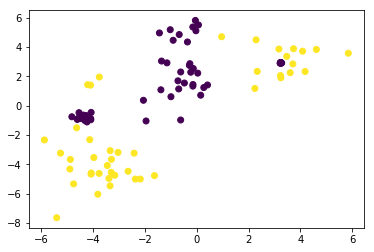

In [25]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y.values.squeeze())
plt.show()

## Training the kernel SVM using `scikit-learn`

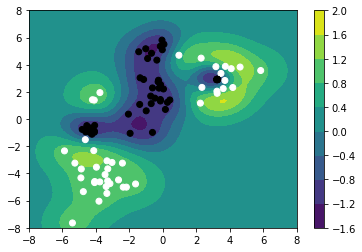

In [36]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', gamma=0.5).fit(X,Y)

def decision(x1, x2, trained_svm):
    samples = np.array([[x1,x2]])
    return trained_svm.decision_function(samples)

vdecision = np.vectorize(decision,excluded=[2])
x1list = np.linspace(-8.0,8.0,100)
x2list = np.linspace(-8.0,8.0,100)
X1, X2 = np.meshgrid(x1list,x2list)
Z = vdecision(X1,X2,clf)
cp = plt.contourf(X1,X2,Z)
plt.colorbar(cp)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='gray')
plt.show()